# TAJ AHMED - DEEP LEARNING - PGD DS&AI B-V

# Question 1

# Gradient Descent & Types of Gradient Descent

Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning and deep learning models. The primary goal is to find the parameters (weights) that minimize the cost function, which measures how well the model fits the training data.

Steps of Gradient Descent:
1- Initialize Parameters: Start with random values for the weights.
2- Compute Gradient: Calculate the gradient of the cost function with respect to each weight.
3- Update Parameters: Adjust the weights in the opposite direction of the gradient by a certain step size, called the learning rate.
4- Repeat: Iterate over steps 2 and 3 until convergence (i.e., the cost function no longer decreases significantly).

Types of Gradient Descent

1- Batch Gradient Descent (BGD):
Description: Uses the entire training dataset to compute the gradient at each step.
Advantages:
Converges smoothly.
Guarantees finding the global minimum for convex functions.
Disadvantages:
Can be very slow for large datasets since it requires a complete pass over the data for each update.
High memory consumption.
Use Case: Suitable for small to medium-sized datasets where memory and computational resources are not a concern.

2- Stochastic Gradient Descent (SGD):
Description: Uses one randomly chosen training example to compute the gradient at each step.
Advantages:
Faster convergence compared to BGD because it updates weights more frequently.
Can escape local minima, potentially finding a better solution.
Disadvantages:
More noisy and less stable than BGD.
The cost function may fluctuate instead of smoothly decreasing.
Use Case: Suitable for large datasets and online learning scenarios where the model is continuously updated with new data.

3- Mini-Batch Gradient Descent:
Description: Uses a small, random subset (mini-batch) of the training data to compute the gradient at each step.
Advantages:
Combines the benefits of both BGD and SGD.
Reduces the variance of parameter updates, leading to more stable convergence.
Efficient use of memory and computational resources.
Disadvantages:
Requires tuning of the mini-batch size.
Use Case: Commonly used in practice for training deep learning models as it offers a good trade-off between the speed of convergence and stability.

# Validation set & Validation Loss

Validation Set

Validation Set is a subset of the dataset used to evaluate the performance of a model during training. Unlike the training set, which is used to fit the model, the validation set is used to fine-tune model parameters and select the best model. It helps in assessing how well the model generalizes to new, unseen data.

Purpose:

Model Selection: Helps in selecting the best model from different models or hyperparameter settings.

Hyperparameter Tuning: Assists in tuning hyperparameters such as learning rate, batch size, and the number of layers.

Early Stopping: Prevents overfitting by monitoring the validation loss and stopping training when it stops improving.

Validation Loss

Validation Loss is the error calculated on the validation set after each training epoch. It measures how well the model performs on the validation set, giving an indication of the model's ability to generalize to new data.

Key Points:

Computation: Validation loss is calculated using the same loss function as the training loss but applied to the validation set.

Monitoring: Tracking the validation loss during training helps in understanding the model's performance and detecting overfitting.

# Question 2

Create a MLP model step by step as we discussed in class and load tips data from Seaborn Library.

Follwoing steps wil be required to create a Multi-Layer Perceptron (MLP) model using the tips dataset from the Seaborn library:

1- Load and Explore the Data: Load the dataset and perform basic exploration.

2- Preprocess the Data: Handle missing values, encode categorical variables, and scale features.

3- Split the Data: Split the data into training and validation sets.

4- Build the MLP Model: Define the architecture of the MLP model.

5- Compile the Model: Specify the optimizer, loss function, and metrics.

6- Train the Model: Fit the model to the training data and validate it.

7- Evaluate the Model: Evaluate the model's performance.

In [6]:
# Step 1 - Load & Explore Data

import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [7]:
# Step 2 - Preprocess the data

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical features
tips['sex'] = LabelEncoder().fit_transform(tips['sex'])
tips['smoker'] = LabelEncoder().fit_transform(tips['smoker'])
tips['day'] = LabelEncoder().fit_transform(tips['day'])
tips['time'] = LabelEncoder().fit_transform(tips['time'])

# Separate features and target
X = tips.drop(columns='tip')  # Features (drop 'tip' column)
y = tips['tip']  # Target (tip amount)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Step 3 - Split the Data

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Step 4 - Build MLP model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 5 - Compile the model

from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [11]:
# Step 6 - Train the Model

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.7326 - mae: 2.7487 - val_loss: 4.4356 - val_mae: 1.8179
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.9575 - mae: 2.2446 - val_loss: 2.8662 - val_mae: 1.3636
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0424 - mae: 1.7614 - val_loss: 1.7271 - val_mae: 1.0118
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0400 - mae: 1.3217 - val_loss: 1.2173 - val_mae: 0.8693
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0365 - mae: 1.1024 - val_loss: 1.3346 - val_mae: 0.9879
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6712 - mae: 0.9722 - val_loss: 1.5230 - val_mae: 1.0496
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5016 - mae: 0.9505 - val_loss: 1.5770 - val_mae: 1.0385
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4365 - mae: 0.9225 - val_loss: 1.4454 - val_mae: 0.9838
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3609 - mae: 0.868

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2228 - mae: 0.8919 
Validation Loss: 1.1764341592788696, Validation MAE: 0.8798268437385559


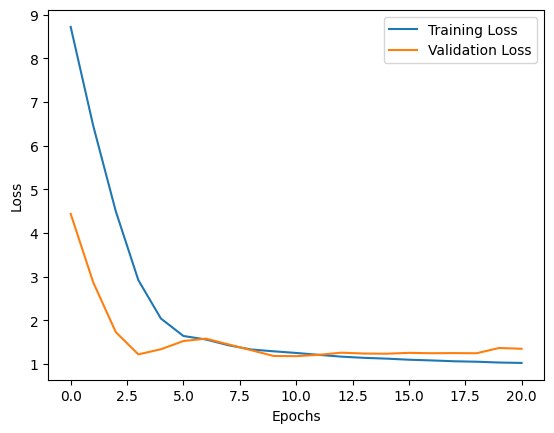

In [12]:
# Step 7 - Evaluate the Model

# Evaluate the model on the validation set
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation MAE: {val_mae}')

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
